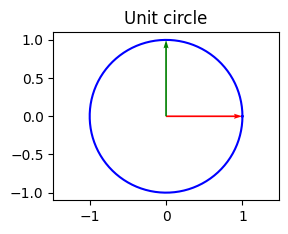

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Task 1: Plotting the unit circle and basis vectors
t = np.linspace(0, 2 * np.pi, 100)
X = np.array([np.cos(t), np.sin(t)])
plt.subplot(2, 2, 1)
plt.plot(X[0, :], X[1, :], 'b')
plt.quiver(0, 0, 1, 0, color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, 0, 1, color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Unit circle')
plt.show()

In [2]:
A = np.array([[2, 1], [-1, 1]])
U, S, V = np.linalg.svd(A)
print("U:\n", U)
print("S:\n", S)
print("V:\n", V)
# Verify orthogonality
print("U' * U:\n", np.dot(U.T, U))
print("V' * V:\n", np.dot(V.T, V))

U:
 [[-0.95709203  0.28978415]
 [ 0.28978415  0.95709203]]
S:
 [2.30277564 1.30277564]
V:
 [[-0.95709203 -0.28978415]
 [-0.28978415  0.95709203]]
U' * U:
 [[1.00000000e+00 1.77671996e-17]
 [1.77671996e-17 1.00000000e+00]]
V' * V:
 [[ 1.00000000e+00 -2.42191841e-17]
 [-2.42191841e-17  1.00000000e+00]]


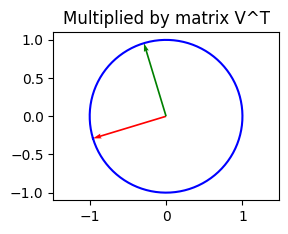

In [3]:
VX = np.dot(V.T, X)
plt.subplot(2, 2, 2)
plt.plot(VX[0, :], VX[1, :], 'b')
plt.quiver(0, 0, V[0, 0], V[0, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, V[1, 0], V[1, 1], color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix V^T')
plt.show()

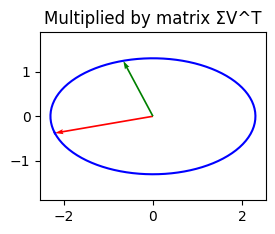

In [4]:
S_matrix = np.diag(S)
SVX = np.dot(S_matrix, VX)
plt.subplot(2, 2, 3)
plt.plot(SVX[0, :], SVX[1, :], 'b')
plt.quiver(0, 0, S[0] * V[0, 0], S[1] * V[0, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, S[0] * V[1, 0], S[1] * V[1, 1], color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix ΣV^T')
plt.show()

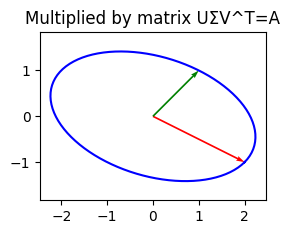

In [5]:
AX = np.dot(U, SVX)
plt.subplot(2, 2, 4)
plt.plot(AX[0, :], AX[1, :], 'b')
plt.quiver(0, 0, U[0, 0] * S[0] * V[0, 0] + U[0, 1] * S[1] * V[0, 1],
U[1, 0] * S[0] * V[0, 0] + U[1, 1] * S[1] * V[0, 1], color='r', angles='xy',
scale_units='xy', scale=1)
plt.quiver(0, 0, U[0, 0] * S[0] * V[1, 0] + U[0, 1] * S[1] * V[1, 1],
U[1, 0] * S[0] * V[1, 0] + U[1, 1] * S[1] * V[1, 1], color='g', angles='xy',
scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix UΣV^T=A')
plt.show()

In [6]:
# Modification example for U and V (this is just a random example, modifications need to be chosen carefully)
U1 = U
V1 = V.T
print("U1 * S * V1.T:\n", np.dot(U1, np.dot(S_matrix, V1.T)))

U1 * S * V1.T:
 [[ 2.  1.]
 [-1.  1.]]


In [7]:
Av1 = np.dot(A, V.T[:, 0])
Av2 = np.dot(A, V.T[:, 1])
print("Av1:\n", Av1)
print("σ1 * u1:\n", S[0] * U[:, 0])
print("Av2:\n", Av2)
print("σ2 * u2:\n", S[1] * U[:, 1])
# Numerical check
print("A * V - U * S:\n", np.dot(A, V.T) - np.dot(U, S_matrix))

Av1:
 [-2.2039682   0.66730788]
σ1 * u1:
 [-2.2039682   0.66730788]
Av2:
 [0.37752373 1.24687618]
σ2 * u2:
 [0.37752373 1.24687618]
A * V - U * S:
 [[-8.88178420e-16  2.77555756e-16]
 [ 3.33066907e-16  2.22044605e-16]]


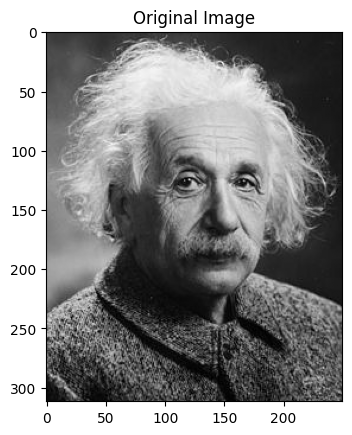

[[-0.02289057  0.00606393 -0.02680614 ... -0.06471034 -0.06665462
   0.03204913]
 [-0.02301567  0.00627313 -0.02728327 ... -0.06729407 -0.07119611
  -0.00200095]
 [-0.0232155   0.00670892 -0.02830342 ...  0.01148528  0.11182873
  -0.06906849]
 ...
 [-0.02350787 -0.00368299 -0.08202969 ... -0.00514235  0.04077141
  -0.01405244]
 [-0.02287557 -0.00292934 -0.0830901  ... -0.01131404 -0.04325662
   0.00077447]
 [-0.02417096  0.00132167 -0.08345419 ...  0.00092967  0.01276302
   0.03731788]]


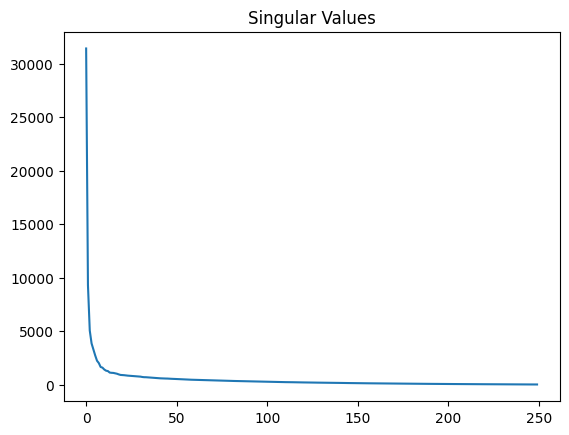

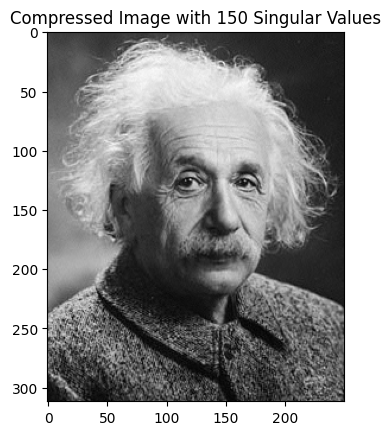

Compression percentage for 150 singular values: -10816.908


In [8]:
import cv2
# Load the image
ImJPG = cv2.imread("Albert_Einstein_Head.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.show()
# Singular Value Decomposition
UIm, SIm, VIm = np.linalg.svd(ImJPG.astype(np.float64), full_matrices=False)
print(UIm)
# Plot Singular Values
plt.figure()
plt.plot(np.arange(len(SIm)), SIm)
plt.title('Singular Values')
plt.show()
# Image compression using truncated SVD
for k in [50, 100, 150]:
    ImJPG_comp = np.dot(UIm[:, :k], np.dot(np.diag(SIm[:k]), VIm[:k, :]))
plt.figure()
plt.imshow(ImJPG_comp, cmap='gray')
plt.title(f'Compressed Image with {k} Singular Values')
plt.show()
pct = 1 - (np.size(UIm[:, :k]) + np.size(VIm[:k, :]) * np.size(np.diag(SIm[:k]))) / np.size(ImJPG)
print(f'Compression percentage for {k} singular values: {pct:.3f}')

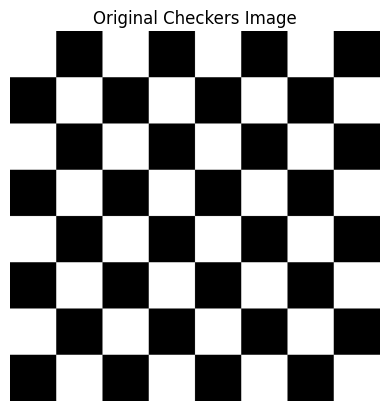

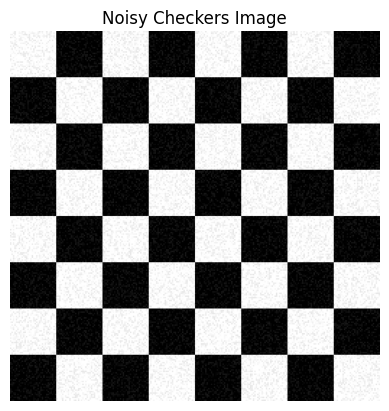

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Load the image
ImJPG = cv2.imread("checkers.pgm", cv2.IMREAD_GRAYSCALE)
# Add noise to the image
m, n = ImJPG.shape
ImJPG_Noisy = ImJPG.astype(np.float64) + 50 * (np.random.rand(m, n) - 0.5)
ImJPG_Noisy = np.clip(ImJPG_Noisy, 0, 255)  # Ensure values are within valid range
# Display the original and noisy images
plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Checkers Image')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(ImJPG_Noisy, cmap='gray')
plt.title('Noisy Checkers Image')
plt.axis('off')
plt.show()

In [10]:
# Compute SVD of the noisy image
UIm, SIm, VIm = np.linalg.svd(ImJPG_Noisy, full_matrices=False)

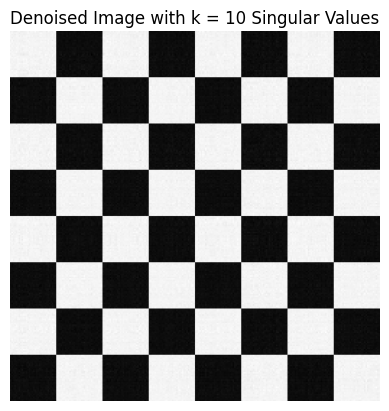

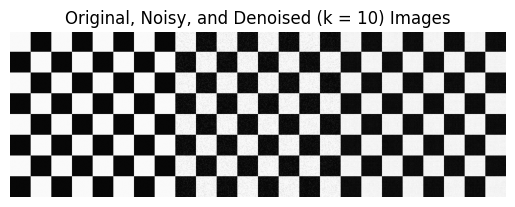

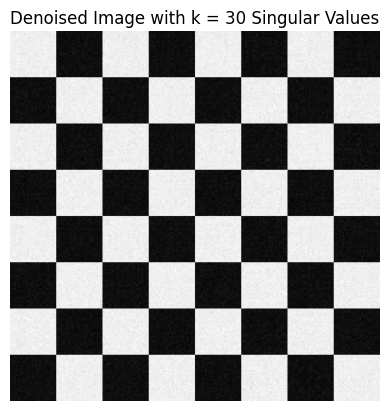

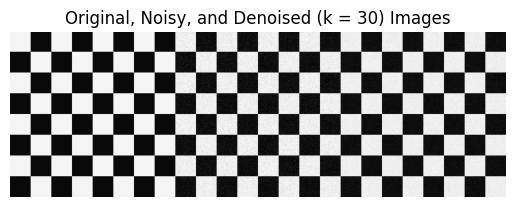

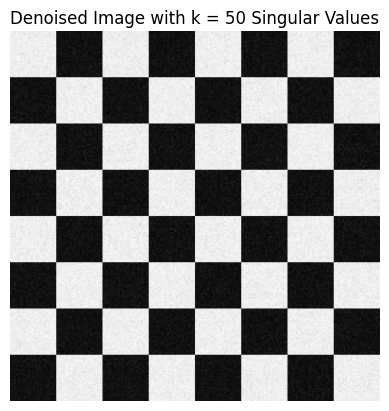

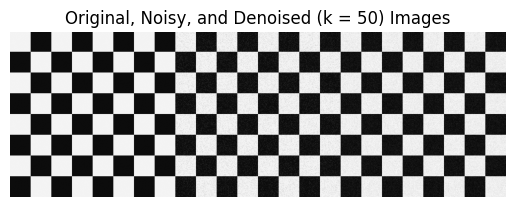

In [11]:
# Function to approximate the image with k singular values
def approximate_image(U, S, V, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))

# Approximations with k = 10, k = 30, k = 50 singular values
ks = [10, 30, 50]
for k in ks:
    ImJPG_approx = approximate_image(UIm, SIm, VIm, k)
    plt.figure()
    plt.imshow(ImJPG_approx, cmap='gray')
    plt.title(f'Denoised Image with k = {k} Singular Values')
    plt.axis('off')
    plt.show()

    # Compare the images to the initial noisy image
    plt.figure()
    plt.imshow(np.hstack((ImJPG, ImJPG_Noisy, ImJPG_approx)), cmap='gray')
    plt.title(f'Original, Noisy, and Denoised (k = {k}) Images')
    plt.axis('off')
    plt.show()